## Importando as bibliotecas

In [1]:
from difflib import SequenceMatcher

In [2]:
import netpixi
from netpixi.integration.gt import Graph
from netpixi.integration.gt import *
import seaborn as sns
from regression.integration.gt import *

import cpnet

from graph_tool import spectral
from graph_tool import clustering

import itertools


<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

## Compilando e renderizando o grafo

In [4]:
g = gt_load('git_hub_sfdp.net.gz')
r = netpixi.render('git_hub_sfdp.net.gz')

## Melhorando visualmento o grafo

In [5]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar um vértice específico a partir de seu id
r.vertex(0, color=0xff0000, size=20)
r.vertex(1, color=0xff0000, size=20)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

## Análise exploratória do grafo

In [6]:
# Números de vértices

n = g.num_vertices()
n

893

In [7]:
# Número de arestas

m = g.num_edges()
m

31953

In [8]:
# Número máximo possível de arestas

if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

398278

In [9]:
# Densidade

d = m / max_edges
d

0.08022788102782479

In [10]:
# Propriedades de cada vértice

data = gt_data(g)

# Degree

degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['degree'] = degrees
data

,degree
id,
0,239
1,133
2,33
3,28
4,247
...,...
888,4
889,1
890,2


count    893.000000
mean      71.563270
std       77.695938
min        1.000000
25%       12.000000
50%       40.000000
75%      107.000000
max      329.000000
Name: degree, dtype: float64

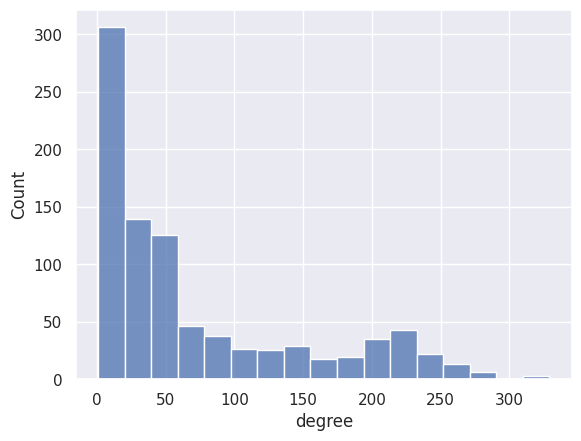

In [11]:
# Histograma do degree

sns.histplot(data['degree']);
data['degree'].describe()

# Análise das variáveis dependentes e independentes

In [12]:
data

,degree
id,
0,239
1,133
2,33
3,28
4,247
...,...
888,4
889,1
890,2


In [13]:
lc = clustering.local_clustering(g)

clustering = []
for value in lc:
    clustering.append(value)

In [18]:
len(clustering)

893

In [33]:
import gzip
import json

nome_arquivo_comprimido = 'git_hub_sfdp.net.gz'
nome_arquivo_descompactado = []

try:
    with gzip.open(nome_arquivo_comprimido, 'r') as arquivo_comprimido:
        arquivo_comprimido.readline()
        for linha in arquivo_comprimido:
            objeto = json.loads(linha.decode('utf-8'))
            nome_arquivo_descompactado.append(objeto['props']['_id'])
except:
    print("Dados coletados!!")

Dados coletados!!


In [107]:
# Dataset original
data_refatorado = pd.read_csv('Github_data_refatorado.csv')

# Dataset refatorado
data_grafo = data_refatorado.copy()
data_grafo = data_refatorado.loc[:, ['name', 'star', 'topic_tag', 'commits']]


# Filtrar as linhas
data_grafo = data_grafo.loc[data_grafo['name'].isin(nome_arquivo_descompactado)]
data_grafo['commits'] = np.log(data_grafo['commits'])
data_grafo['PC'] = clustering
data_grafo

,name,star,topic_tag,commits,PC
0,keras,47900.0,"['deep-learning', 'tensorflow', 'neural-networ...",8.583355,0.658662
1,scikit-learn,40300.0,"['machine-learning', 'python', 'statistics', '...",10.142701,0.828093
2,PythonDataScienceHandbook,23100.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",5.455321,0.943182
3,Probabilistic-Programming-and-Bayesian-Methods...,21000.0,"['bayesian-methods', 'pymc', 'mathematical-ana...",6.983790,0.955026
5,data-science-ipython-notebooks,18300.0,"['python', 'machine-learning', 'deep-learning'...",6.297109,0.607090
...,...,...,...,...,...
1475,Adafruit-Fingerprint-Sensor-Library,237.0,"['arduino', 'sensor', 'library', 'fingerprint']",4.290459,0.833333
1481,VeloView,218.0,"['lidar', 'lidar-camera-calibration', 'lidar-d...",7.410347,0.000000
1491,NaveGo,204.0,"['navigation', 'inertial-sensors', 'allan-vari...",5.749393,1.000000
1492,home-assistant-config,204.0,"['home-assistant', 'home-assistant-config', 'h...",5.455321,0.333333


In [109]:
result = reg.linear(data=data_grafo, formula='commits ~ PC + star')
result.micro_summary()

variable,coefficient,std error,p-value
PC,-0.792197,0.249130,0.001524
star,0.000042,0.000003,0.000000


In [110]:
result.nano_summary()

-0.792 (0.249) ***
+0.000 (0.000) ***


In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

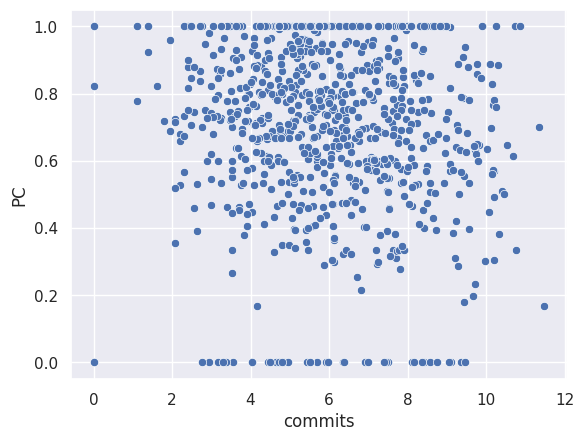

In [112]:
sns.scatterplot(x=data_grafo["commits"], y=data_grafo["PC"]);

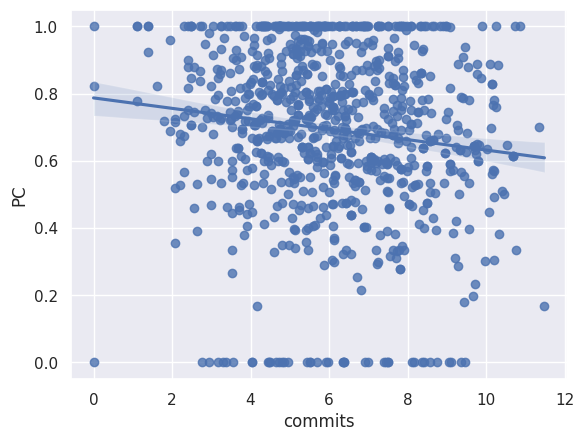

In [113]:
sns.regplot(x=data_grafo["commits"], y=data_grafo["PC"]);